In [34]:
#IMPORT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [35]:
#LOAD DATA
df_w = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = df_w.drop('id',axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [37]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [38]:
# DATA CLEANING
# Replacing missing NA values in 'bmi' with their mean bmi of their gender

F_missing_bmi_index = df[(df.gender == 'Female') & (df.bmi.isna())].index
df.loc[F_missing_bmi_index, 'bmi'] = 29

M_missing_bmi_index = df[(df.gender == 'Male') & (df.bmi.isna())].index
df.loc[M_missing_bmi_index, 'bmi'] = 28

In [39]:
# Removing the one instance where gender is 'Other'

other_index = df[df['gender'] =='Other'].index
df = df.drop(other_index)

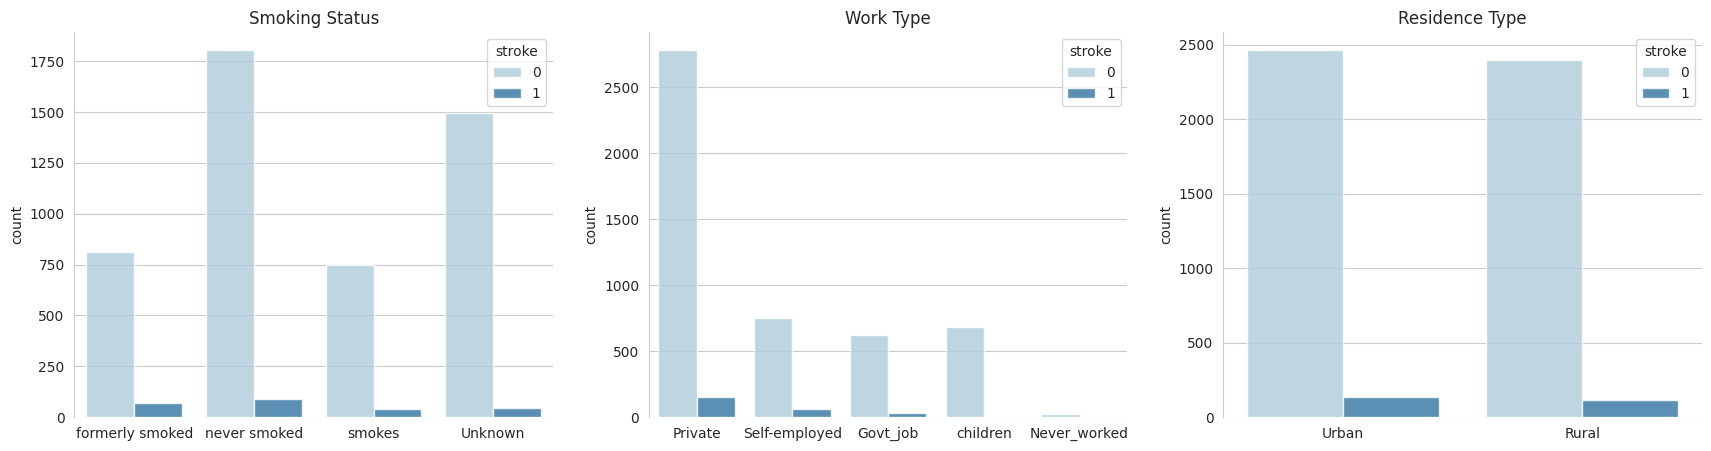

In [40]:
#STROKE PROBABILITY
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=df['smoking_status'], alpha=0.8, palette="Paired",hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Smoking Status');

plt.subplot(1,3,2)
sns.countplot(x=df['work_type'], alpha=0.8, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Work Type');

plt.subplot(1,3,3)
sns.countplot(x=df['Residence_type'], alpha=0.8, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Residence Type');

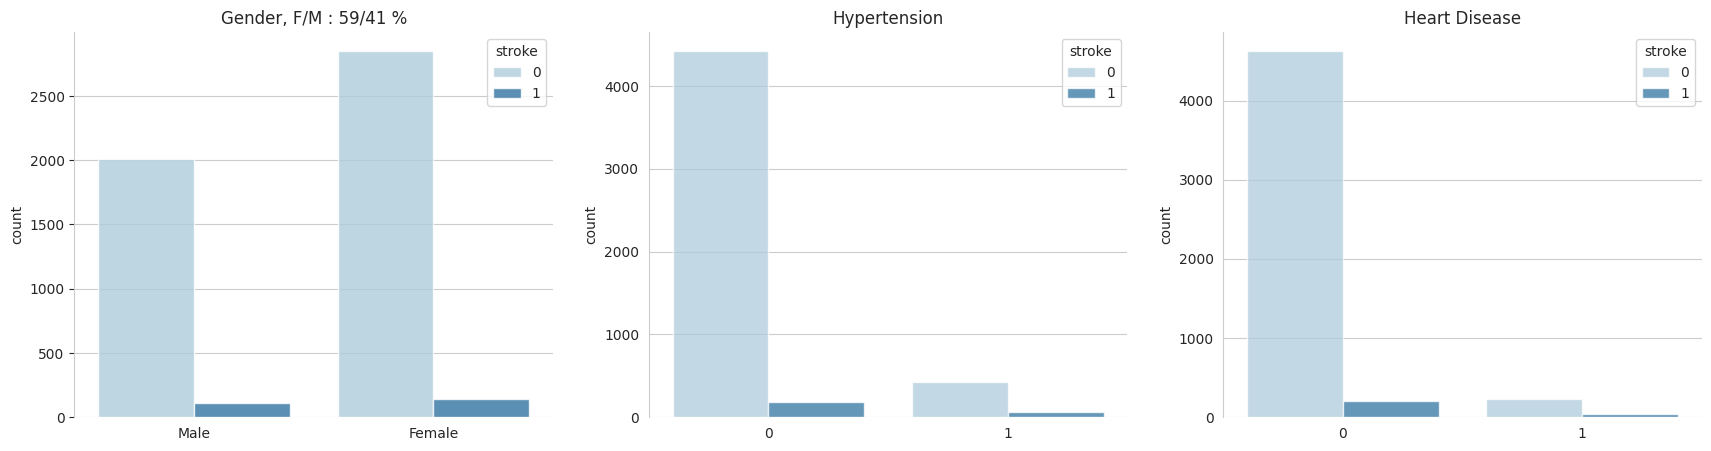

In [8]:
#SIGNIFICANT CORRELATION
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=df['gender'], alpha=0.8, palette="Paired", hue=df['stroke']);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Gender, F/M : 59/41 %');

plt.subplot(1,3,2)
sns.countplot(x=df['hypertension'], alpha=0.75, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hypertension');

plt.subplot(1,3,3)
sns.countplot(x=df['heart_disease'], alpha=0.75, palette="Paired", hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Heart Disease');

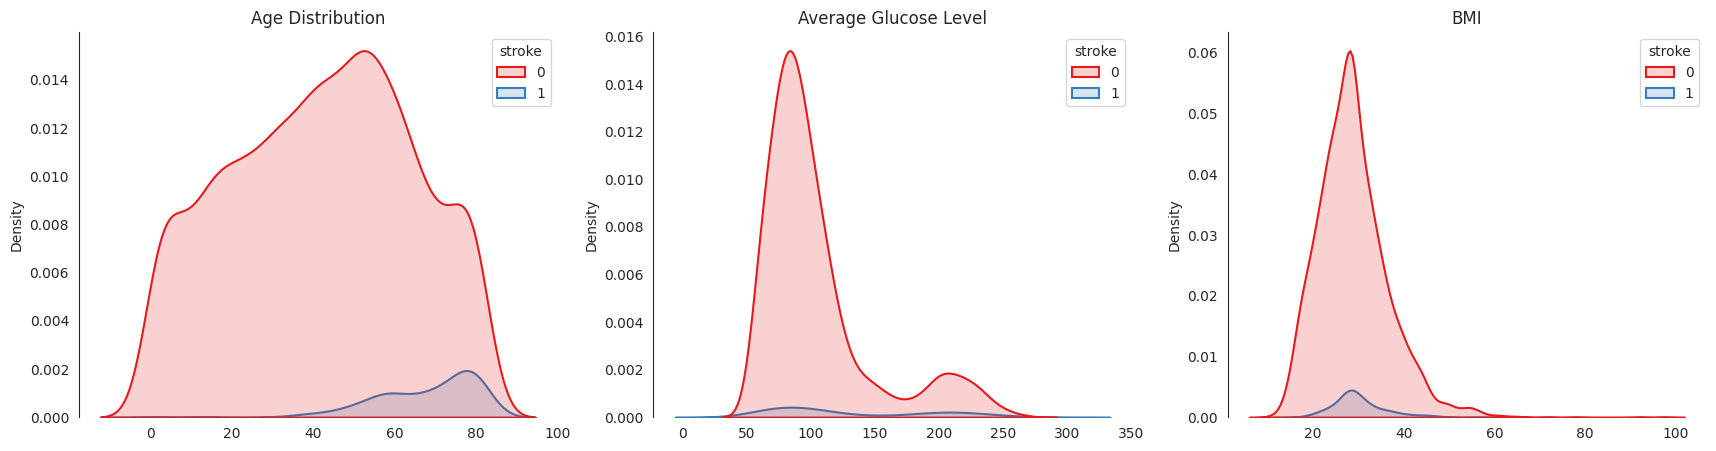

In [9]:
#KERNEL DENSITY ESTIMATION
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x=df['age'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Age Distribution');

plt.subplot(1,3,2)
sns.kdeplot(x=df['avg_glucose_level'], alpha=0.2, palette="Set1", label='avg_glucose_level',linewidth=1.5, fill=True, hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Average Glucose Level');

plt.subplot(1,3,3)
sns.kdeplot(x=df['bmi'], alpha=0.2, palette="Set1", label='BMI',shade=True, linewidth=1.5, fill=True, hue=df['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('BMI');

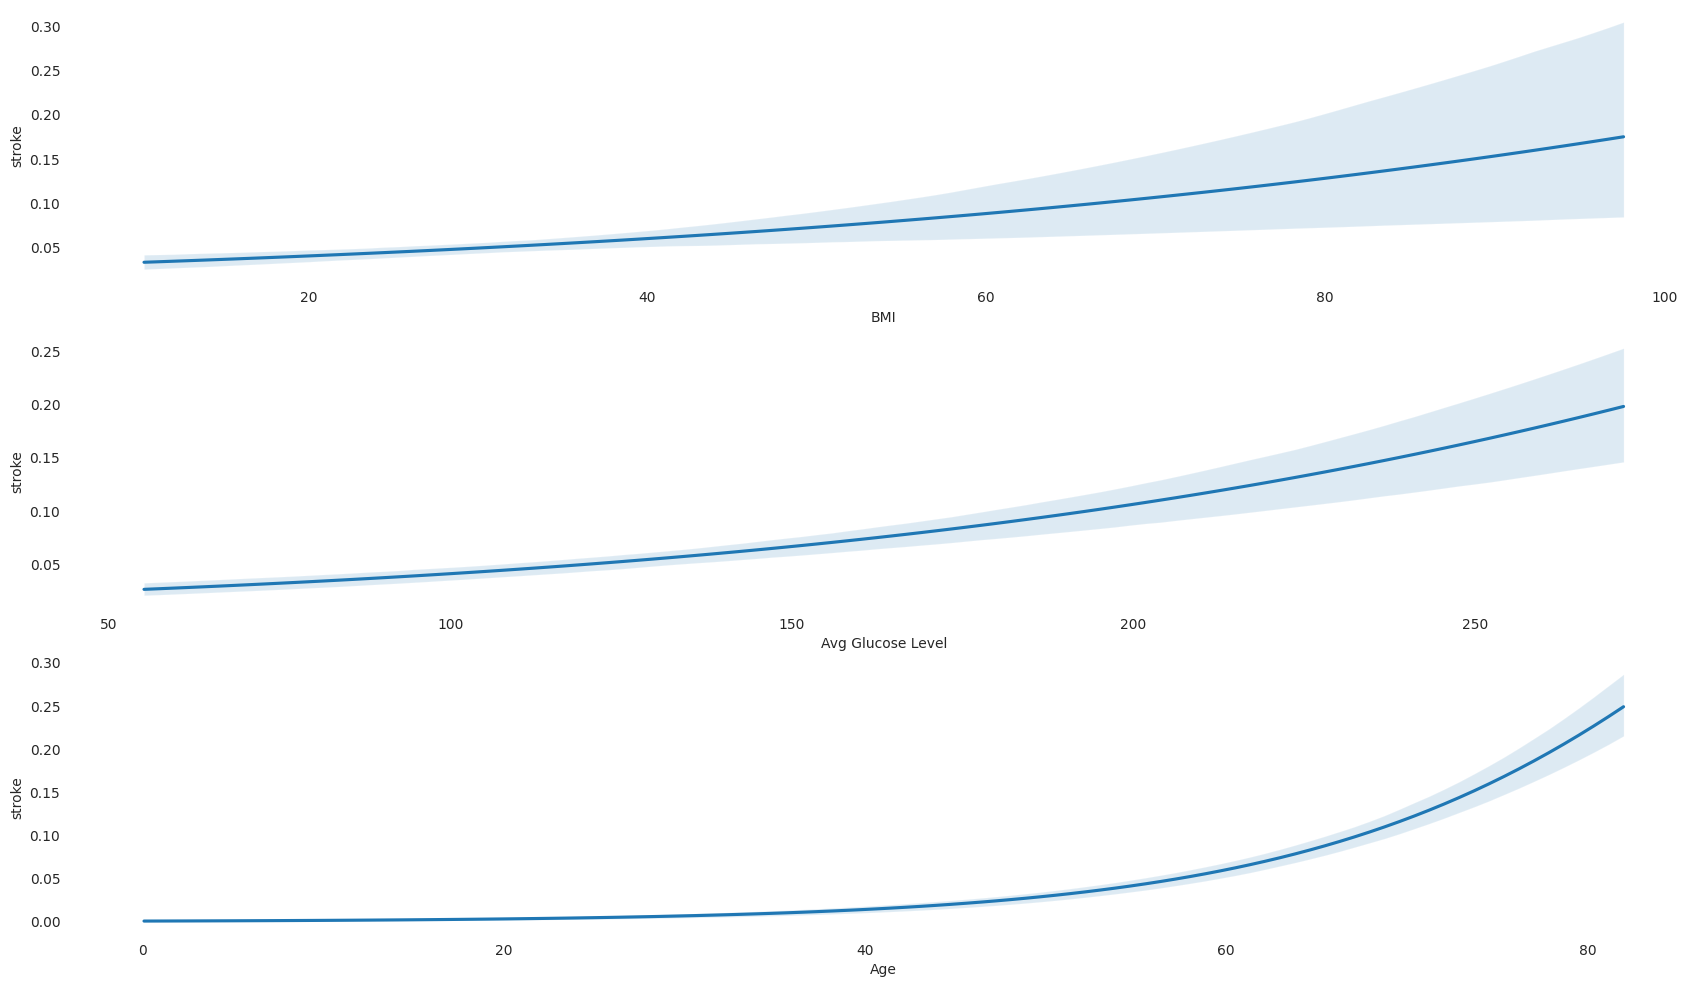

In [10]:
#LOGISTIC REGRESSION
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,12));

plt.subplot(3,1,1)
sns.regplot(x=df['bmi'], y=df['stroke'], scatter=False, logistic=True, label= 'BMI');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('BMI');

plt.subplot(3,1,2)
sns.regplot(x=df['avg_glucose_level'], y=df['stroke'], scatter=False, logistic=True, label='Avg Glucose Level');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Avg Glucose Level');

plt.subplot(3,1,3)
sns.regplot(x=df['age'], y=df['stroke'], scatter=False, logistic=True, label='Age');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Age');

In [11]:
# CHECKING IMBALANCES IN CLASS {1: stroke, 0:no stroke}
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [12]:
# PREPOCESSING DATA
# Encoding categorical values

df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
df['ever_married'] = df['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}).astype(np.uint8)

In [21]:
# MODEL BUILDING
# Defining features and target

X = df.drop('stroke', axis=1)
y = df.pop('stroke')

In [16]:
# MODEL BUILDING USE SVM
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42, probability=True))])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y)

In [23]:
# Our data is biased, we can fix this with SMOTE

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

In [24]:
from sklearn.model_selection import train_test_split,cross_val_score
svm_cv = cross_val_score(svm_pipeline,X_train_resh,y_train_resh,cv=10,scoring='f1')
svm_cv.mean()

0.8288195553672064

In [27]:
# MODEL EVALUATION
from sklearn.metrics import confusion_matrix

svm_pipeline.fit(X_train_resh,y_train_resh);
svm_train_predict = svm_pipeline.predict(X_train)
svm_pred = svm_pipeline.predict(X_test)
svm_cm = confusion_matrix(y_train,svm_train_predict)
svm_cm

array([[2970,  681],
       [  68,  112]])

Auc :  0.7711487515134079


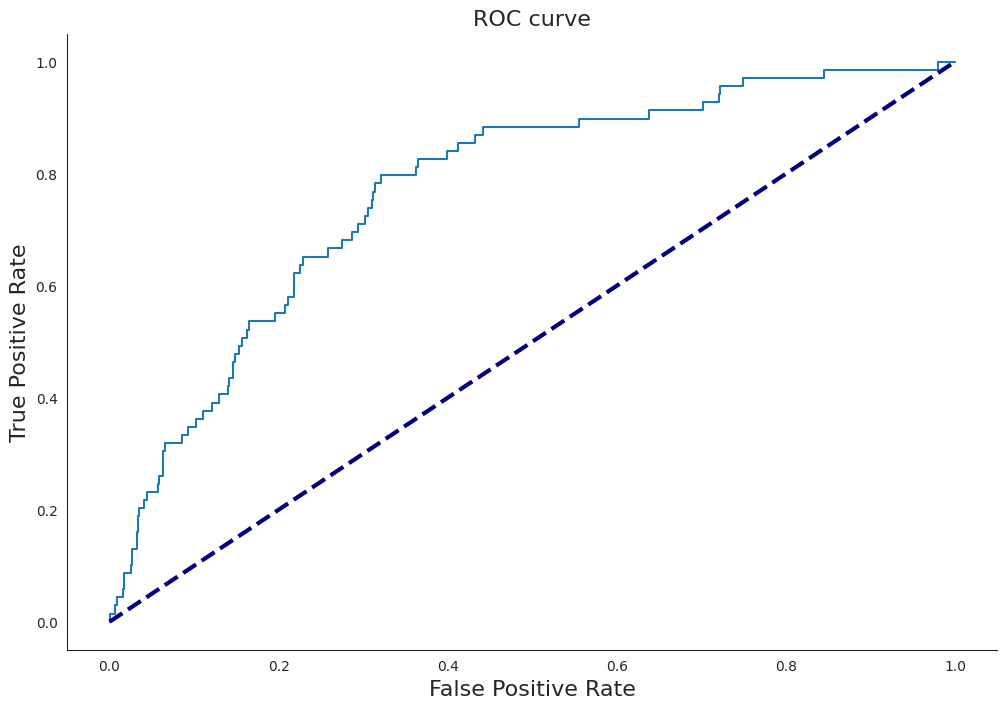

In [26]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, svm_pipeline.predict_proba(X_test)[:,1])

plt.figure(figsize=(12,8));

plt.plot(fpr_lr, tpr_lr);
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
plt.title('ROC curve', fontsize=16);
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--');
#plt.axes().set_aspect('equal');
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False);

print('Auc : ', auc(fpr_lr, tpr_lr))

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
print(classification_report(y_test, svm_pred))

print('Accuracy Score: ',accuracy_score(y_test,svm_pred))
print('F1 Score: ',f1_score(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1209
           1       0.15      0.54      0.23        69

    accuracy                           0.81      1278
   macro avg       0.56      0.68      0.56      1278
weighted avg       0.92      0.81      0.86      1278

Accuracy Score:  0.810641627543036
F1 Score:  0.23417721518987342
